# INFO-F-422 -  Statistical Foundations of Machine Learning 

### MATAGNE Miro-Manuel - __[Miro-Manuel.Matagne@ulb.be](mailto:Miro-Manuel.Matagne@ulb.be) - Student ID 459668__
### Student 2 - __[student2@vub.ac.be](mailto:student2@ulb.ac.be) - Student ID 789012__
### Student 3 - __[student3@ulb.ac.be](mailto:student3@ulb.ac.be) - Student ID 345678__

### Video presentation: www.youtube.com/abcd1234

## Project Title


# Introduction


## Read the datasets

The training datasets are imported (*training* here means that this data will not be used for the final assessment of the solution quality by DrivenData).

Notice that the characters are read as factors in order to be able to study the categorical variables later on.

In [104]:
X <- read.csv("training_set_values.csv",stringsAsFactors = T)
Y <- read.csv("training_set_labels.csv",stringsAsFactors = T)

## Data exploration

For both these datasets, the dimensions, the head and the summary are displayed in order to get a first feel of the data.

In [76]:
dim(X)
head(X)
summary(X)

[1] 59400    40

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,69572,6000,2011-03-14,Roman,1390,Roman,34.93809,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2,8776,0,2013-03-06,Grumeti,1399,GRUMETI,34.69877,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,,GeoData Consultants Ltd,Other,,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
3,34310,25,2013-02-25,Lottery Club,686,World vision,37.46066,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
4,67743,0,2013-01-28,Unicef,263,UNICEF,38.48616,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
5,19728,0,2011-07-13,Action In A,0,Artisan,31.13085,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,,,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
6,9944,20,2011-03-13,Mkinga Distric Coun,0,DWE,39.17280,-4.765587,Tajiri,0,Pangani,Moa/Mwereme,Tanga,4,8,Mkinga,Moa,1,True,GeoData Consultants Ltd,VWC,Zingibali,True,2009,submersible,submersible,submersible,vwc,user-group,pay per bucket,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe


       id          amount_tsh          date_recorded  
 Min.   :    0   Min.   :     0.0   2011-03-15:  572  
 1st Qu.:18520   1st Qu.:     0.0   2011-03-17:  558  
 Median :37062   Median :     0.0   2013-02-03:  546  
 Mean   :37115   Mean   :   317.7   2011-03-14:  520  
 3rd Qu.:55656   3rd Qu.:    20.0   2011-03-16:  513  
 Max.   :74247   Max.   :350000.0   2011-03-18:  497  
                                    (Other)   :56194  
                    funder        gps_height          installer    
 Government Of Tanzania: 9084   Min.   : -90.0   DWE       :17402  
                       : 3635   1st Qu.:   0.0             : 3655  
 Danida                : 3114   Median : 369.0   Government: 1825  
 Hesawa                : 2202   Mean   : 668.3   RWE       : 1206  
 Rwssp                 : 1374   3rd Qu.:1319.2   Commu     : 1060  
 World Bank            : 1349   Max.   :2770.0   DANIDA    : 1050  
 (Other)               :38642                    (Other)   :33202  
   longitude    

In [51]:
dim(Y)
head(Y)
summary(Y)

[1] 59400     2

,id,status_group
,<int>,<fct>
1,69572,functional
2,8776,functional
3,34310,functional
4,67743,non functional
5,19728,functional
6,9944,functional


       id                         status_group  
 Min.   :    0   functional             :32259  
 1st Qu.:18520   functional needs repair: 4317  
 Median :37062   non functional         :22824  
 Mean   :37115                                  
 3rd Qu.:55656                                  
 Max.   :74247                                  

This histogram shows that there are large differences in terms of numbers of samples corresponding to each class. In particular, we see that there are very few samples falling in the category $functional needs repair$, which might be a problem because a model will have a lot of trouble predicting this class since the number of corresponding training samples is very low.

[1] Functional : 32259

[1] Functional needs repair : 4317

[1] Non functional : 22824

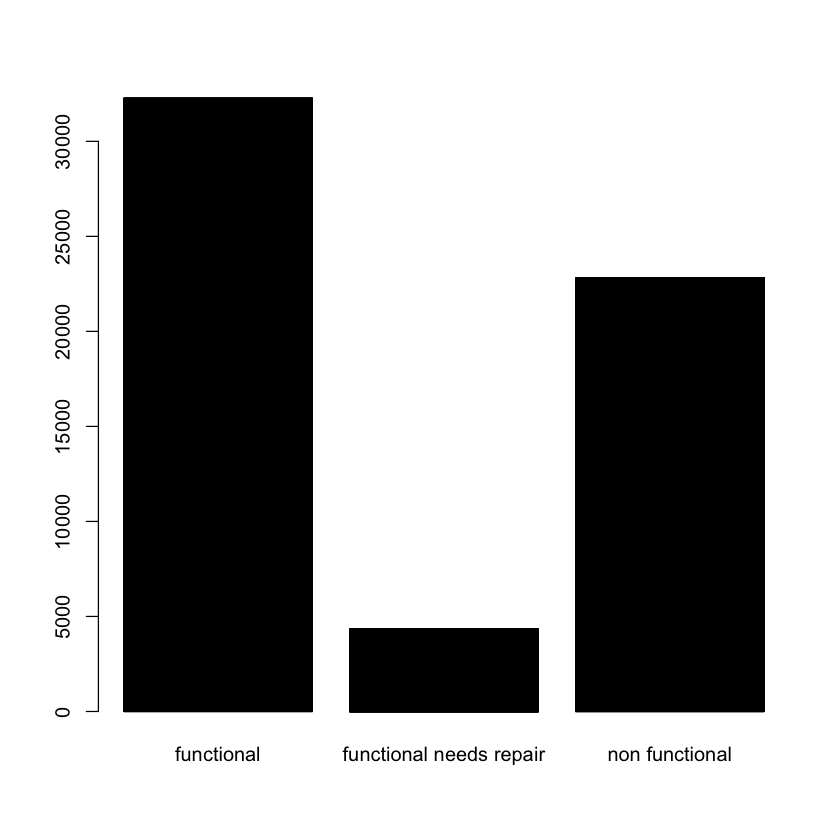

In [52]:
noquote(paste("Functional :",sum(Y$status_group=="functional")))
noquote(paste("Functional needs repair :",sum(Y$status_group=="functional needs repair")))
noquote(paste("Non functional :",sum(Y$status_group=="non functional")))

barplot(table(Y))

# Data preprocessing

## Missing value imputation


We check if there are any missing values in the dataset. The results show that no empty values are present in either dataset.

In [53]:
sum(is.na(X))
sum(is.na(Y))

[1] 0

[1] 0

It is however important to note that this result does not look for empty strings in the categorical variables. Indeed, we saw previously in the summaries of the datasets that there were wome empty strings, for example for features $funder$, $installer$, $subvillage$, $scheme\_management$,...

It is also important to check that all entries in X have a corresponding entry in Y. To do so, we merge the 2 datasets X and Y based on their common feature $id$ and check the dimension of the resulting dataset. As expected, the merged dataset has 59400 entries and 41 features, which means that for all samples in X there exists a corresponding sample in Y.

In [105]:
data <- merge(X,Y)
dim(data)
head(data)

[1] 59400    41

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<fct>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,2012-11-13,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,GeoData Consultants Ltd,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,2011-03-05,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,GeoData Consultants Ltd,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,2011-03-27,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,GeoData Consultants Ltd,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,2013-06-03,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,GeoData Consultants Ltd,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,2011-03-22,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,GeoData Consultants Ltd,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,2011-02-26,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,GeoData Consultants Ltd,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


## Handle categorical variables

All the categorical variables present in the merged dataset are presented below.

In [106]:
categorical_variables <- which(sapply(data[1,],class)=="factor")
colnames(data[,categorical_variables])

[1] "date_recorded"         "funder"                "installer"            
 [4] "wpt_name"              "basin"                 "subvillage"           
 [7] "region"                "lga"                   "ward"                 
[10] "public_meeting"        "recorded_by"           "scheme_management"    
[13] "scheme_name"           "permit"                "extraction_type"      
[16] "extraction_type_group" "extraction_type_class" "management"           
[19] "management_group"      "payment"               "payment_type"         
[22] "water_quality"         "quality_group"         "quantity"             
[25] "quantity_group"        "source"                "source_type"          
[28] "source_class"          "waterpoint_type"       "waterpoint_type_group"
[31] "status_group"

### Useless features

A check is made to ensure all categorical variables take more than 1 possible value, otherwise they are not necessary since they do not bring any information. The following code shows that the feature $recorded\_by$ contains only 1 factor, which is $GeoData Consultants Ltd$.

In [107]:
for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l < 2) {
        print(n)
        print(data[1,n])
    }
}

[1] "recorded_by"
[1] GeoData Consultants Ltd
Levels: GeoData Consultants Ltd


In [108]:
data <- subset(data,select=-c(recorded_by))

In [109]:
dim(data)

[1] 59400    40

### Convert the dates

The feature $date\_recorded$ is a categorical variable but can easily be converted into a numerical one.

In [110]:
data$date_recorded <- as.numeric(as.Date(data$date_recorded))
head(data)
#as.Date(max(numeric_dates),origin = "1970-01-01")

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,15657,Tasaf,0,TASAF,33.12583,-5.118154,Mratibu,0,Lake Tanganyika,Majengo,Tabora,14,3,Uyui,Igalula,0,,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,15038,Shipo,1978,SHIPO,34.77072,-9.395642,none,0,Rufiji,Magoda C,Iringa,11,4,Njombe,Uwemba,20,True,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,15060,Lvia,0,LVIA,36.11506,-6.279268,Bombani,0,Wami / Ruvu,Songambele,Dodoma,1,4,Chamwino,Msamalo,0,True,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,15859,Germany Republi,1639,CES,37.14743,-3.187555,Area 7 Namba 5,0,Pangani,Urereni,Kilimanjaro,3,5,Hai,Masama Magharibi,25,True,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,15055,Cmsr,0,CMSR,36.16489,-6.099289,Ezeleda,0,Wami / Ruvu,Maata A,Dodoma,1,4,Chamwino,Majeleko,0,True,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,15031,Private,28,Private,39.28612,-6.972403,Kwa Namaj,0,Wami / Ruvu,Mwandege,Pwani,60,43,Mkuranga,Vikindu,6922,True,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


### Handle the coordinates

The dataset contains $longitude$ and $latitude$ features which can be useful in the sense that the outcome of the prediction might depend on if the water pumps are located in a similar region.

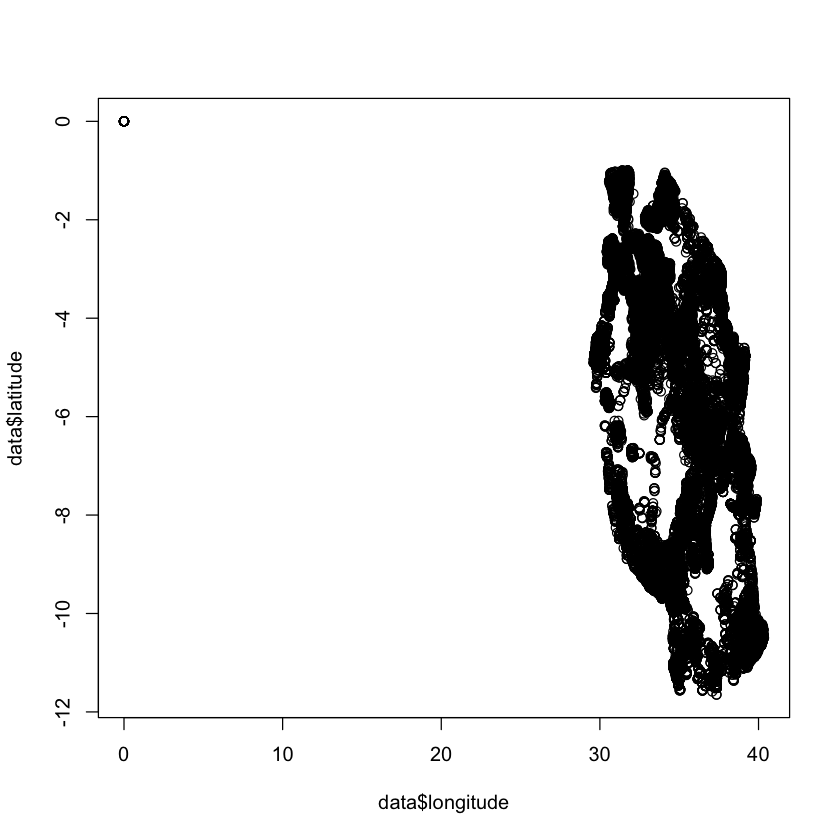

In [60]:
plot(data$longitude,data$latitude)

There seems to be some outliers having coordinates (0,0), which we will remove since they represent null values :

In [111]:
data <- data[data$longitude > 20 & data$latitude <0,]
dim(data)

[1] 57588    40

The new longitudes and latitudes, after filtering, are represented below :

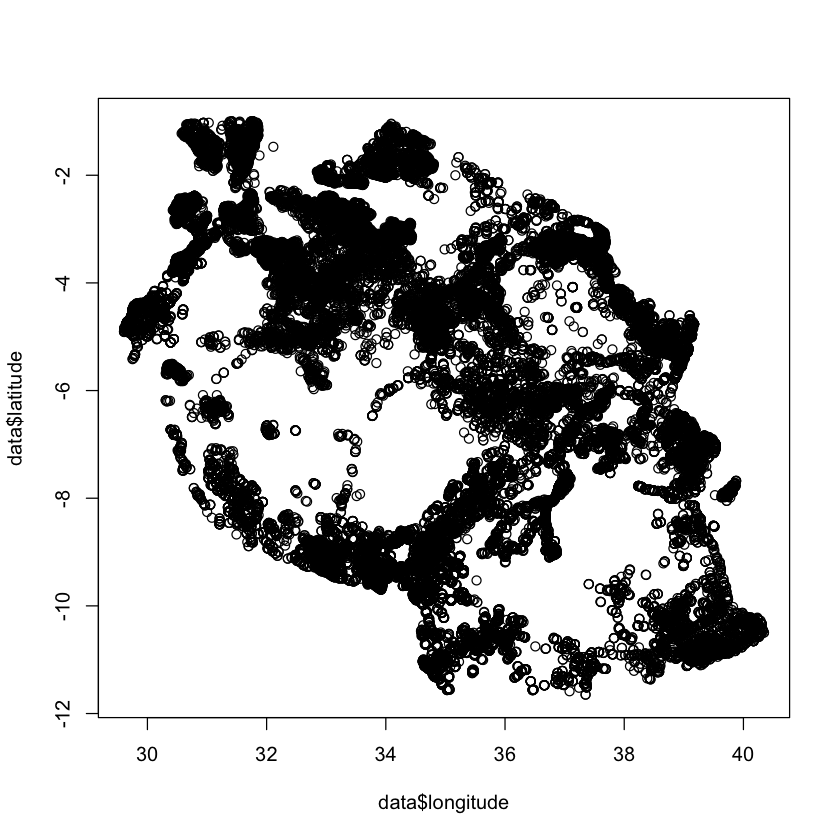

In [62]:
plot(data$longitude,data$latitude)

In [45]:
install.packages("factoextra")


also installing the dependencies ‘rematch’, ‘cellranger’, ‘readxl’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘carData’, ‘pbkrtest’, ‘rio’, ‘lme4’, ‘corrplot’, ‘car’, ‘flashClust’, ‘leaps’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’





The downloaded binary packages are in
	/var/folders/5s/m318ng1j19dd_3kmbrnrg9vh0000gn/T//RtmpnmnZYn/downloaded_packages


In [63]:
library(factoextra)

Although there is already an attribute $region\_code$ in the dataset, we might use these coordinates to our advantage by defining a custom notion of spaciality between the water pumps. Using k-means clustering, we can separate the pumps into k different geographical regions based on $longitude$ and $latitude$. The advangate of this method compared to the $region\_code$ feature is that we can choose how small or large the different regions are.

In [112]:
coordinates <- as.data.frame(cbind(data$longitude,data$latitude))
km.res <- kmeans(coordinates,20)
head(km.res$cluster,20)
#km.res

[1] 16 19  4  6  4 13 16  4  4 18  9  7 20  7  4  3 14  4 13 15

The graphical representation of the regions after the k-means clustering is shown below.

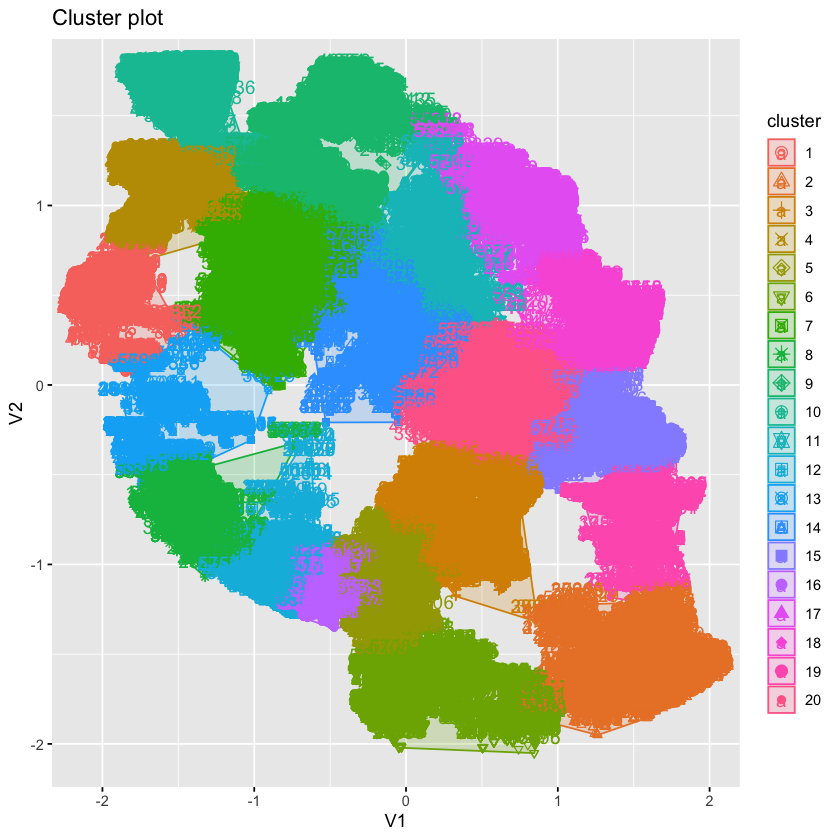

In [65]:
fviz_cluster(km.res,coordinates)

Therefore, we can now remove the longitude and latitude features from the dataset and replace them with a new feature called $region$, representing the cluster in which the pump is located.

In [113]:
data <- subset(data,select=-c(longitude,latitude))

In [114]:
data$region <- km.res$cluster

In [115]:
options(repr.matrix.max.cols=50)
head(data)

,id,amount_tsh,date_recorded,funder,gps_height,installer,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<dbl>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,15657,Tasaf,0,TASAF,Mratibu,0,Lake Tanganyika,Majengo,16,14,3,Uyui,Igalula,0,,VWC,,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,15038,Shipo,1978,SHIPO,none,0,Rufiji,Magoda C,19,11,4,Njombe,Uwemba,20,True,,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,15060,Lvia,0,LVIA,Bombani,0,Wami / Ruvu,Songambele,4,1,4,Chamwino,Msamalo,0,True,VWC,Mgun,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,15859,Germany Republi,1639,CES,Area 7 Namba 5,0,Pangani,Urereni,6,3,5,Hai,Masama Magharibi,25,True,Water Board,Losaa-Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,15055,Cmsr,0,CMSR,Ezeleda,0,Wami / Ruvu,Maata A,4,1,4,Chamwino,Majeleko,0,True,VWC,,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,15031,Private,28,Private,Kwa Namaj,0,Wami / Ruvu,Mwandege,13,60,43,Mkuranga,Vikindu,6922,True,Private operator,,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


### Variables with too many levels

Some categorical variables that have too many levels could be useless for the problem. Indeed, let us imagine if each sample has a different factor for a given feature, this would not bring any additional information. This is why we check what features have a huge amount of features below :

In [116]:
categorical_variables <- which(sapply(data[1,],class)=="factor")

problematic_features <- c()

for (n in colnames(data[,categorical_variables])) {
    l <- nlevels(data[,n])
    if (l > 2000) {
        #print(n)
        problematic_features <- c(problematic_features,n)
        #print(data[1,n])
    }
}
problematic_features

[1] "installer"   "wpt_name"    "subvillage"  "ward"        "scheme_name"

In [117]:
backup <- data

In [118]:
dim(backup)

[1] 57588    38

In [138]:
data <- backup

For each one of these features, we check the distribution of the different categories.

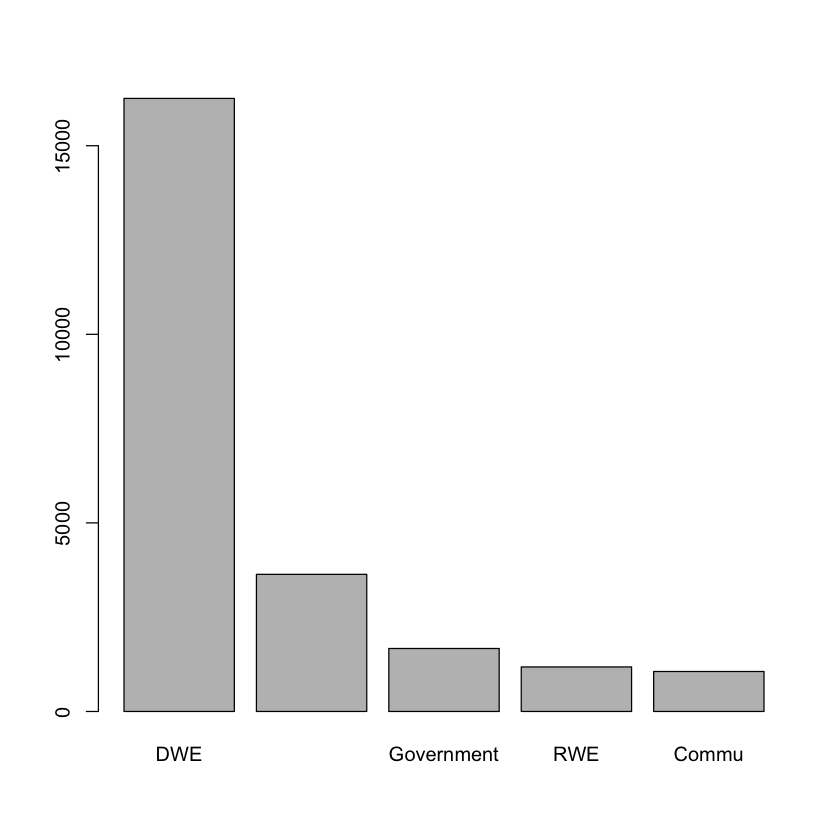

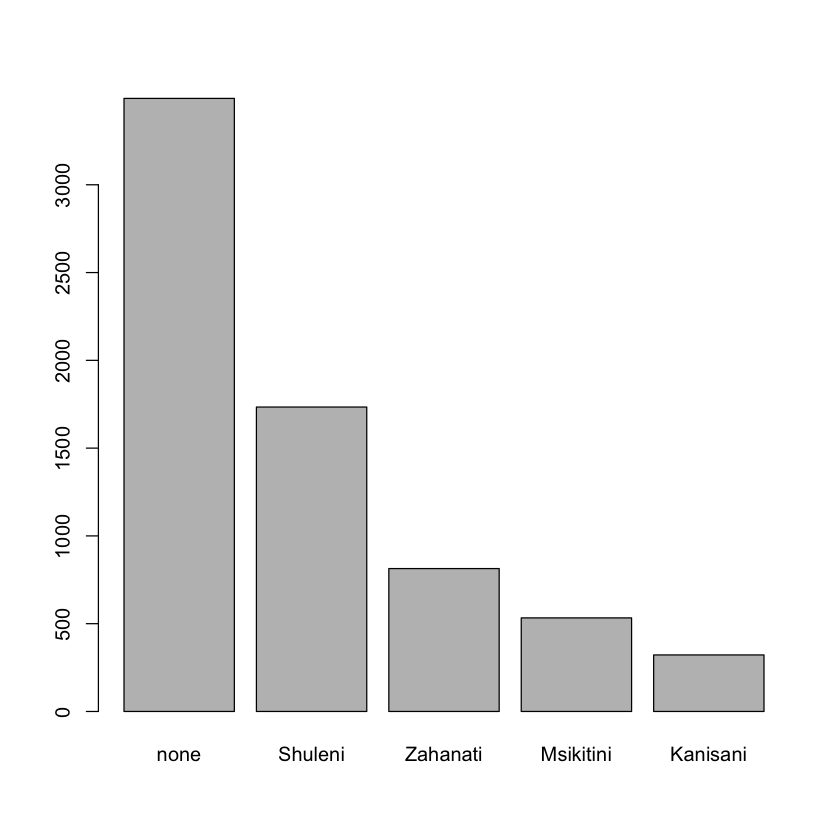

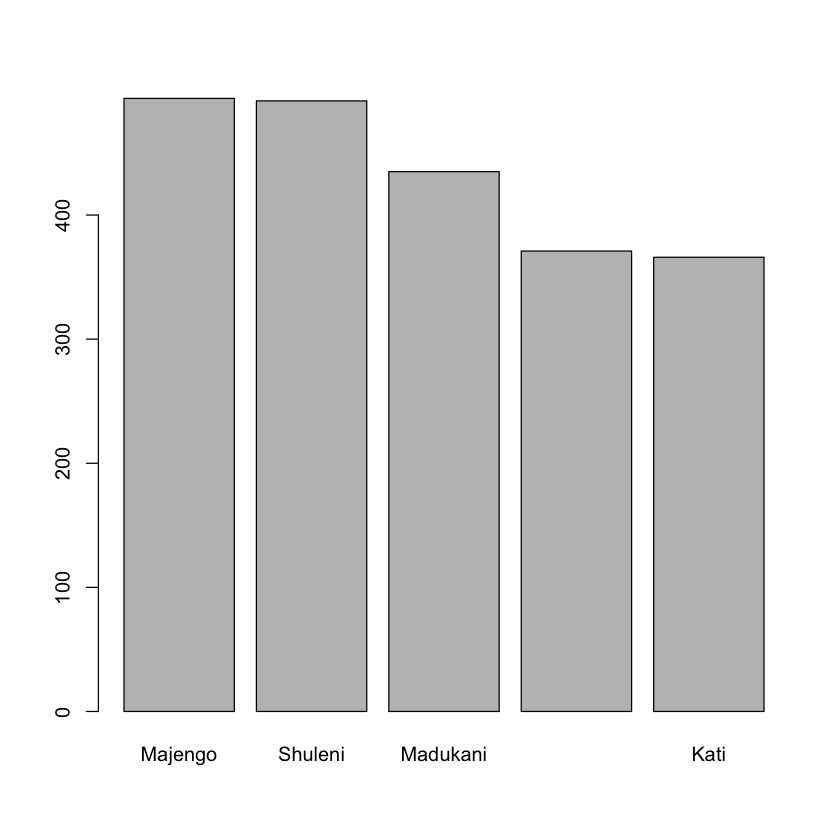

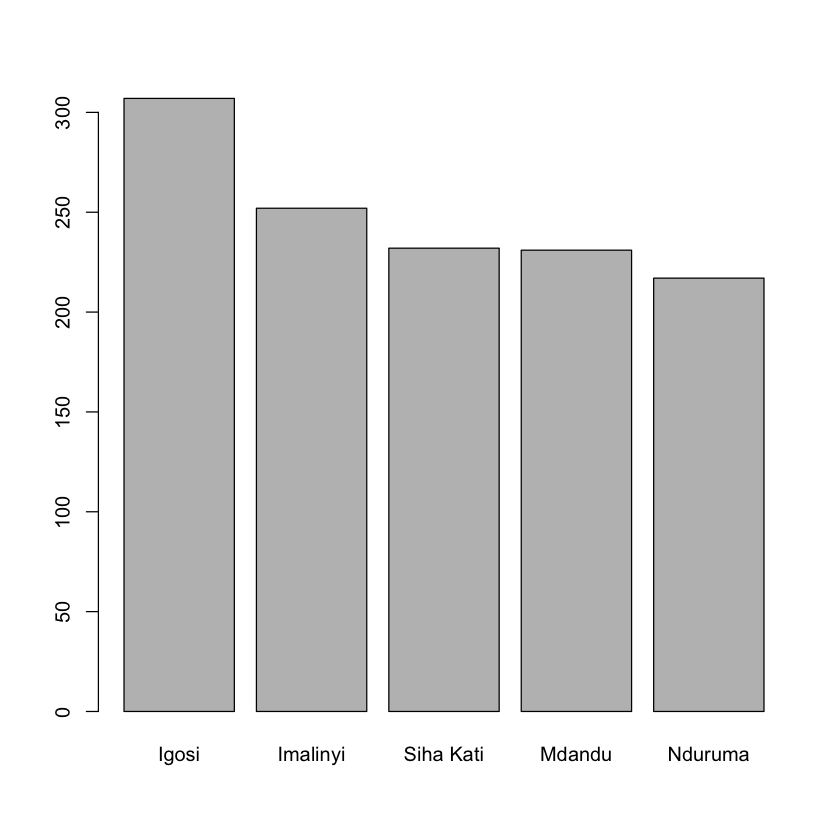

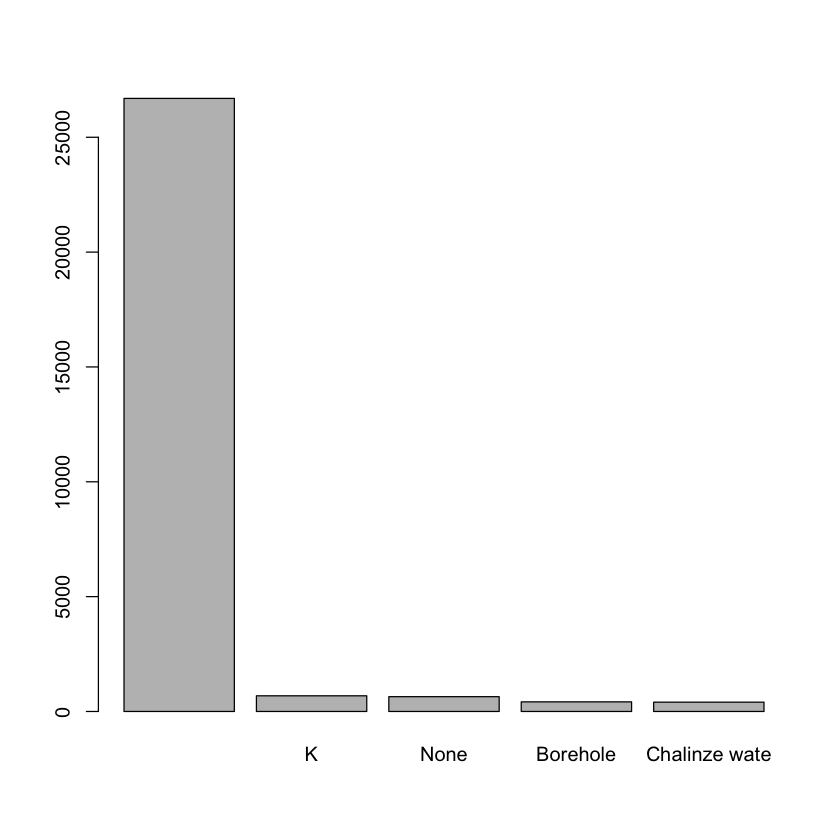

In [139]:
for (f in problematic_features) {
    factors <- table(data[,f])
    barplot( (sort(factors, decreasing=TRUE)[1:5] ))
}

In [140]:
typeof(problematic_features)
data <- subset(data,select=-which(names(data) %in% problematic_features))
dim(data)
head(data)

[1] "character"

[1] 57588    33

,id,amount_tsh,date_recorded,funder,gps_height,num_private,basin,region,region_code,district_code,lga,population,public_meeting,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
,<int>,<dbl>,<dbl>,<fct>,<int>,<int>,<fct>,<int>,<int>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,0,0,15657,Tasaf,0,0,Lake Tanganyika,16,14,3,Uyui,0,,VWC,True,0,afridev,afridev,handpump,vwc,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
2,1,0,15038,Shipo,1978,0,Rufiji,19,11,4,Njombe,20,True,,False,2008,other - rope pump,rope pump,rope pump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
3,2,0,15060,Lvia,0,0,Wami / Ruvu,4,1,4,Chamwino,0,True,VWC,True,0,mono,mono,motorpump,vwc,user-group,pay per bucket,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional
4,3,10,15859,Germany Republi,1639,0,Pangani,6,3,5,Hai,25,True,Water Board,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
5,4,0,15055,Cmsr,0,0,Wami / Ruvu,4,1,4,Chamwino,0,True,VWC,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
6,5,50,15031,Private,28,0,Wami / Ruvu,13,60,43,Mkuranga,6922,True,Private operator,False,0,submersible,submersible,submersible,private operator,commercial,pay per bucket,per bucket,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,functional


In [157]:
categorical_variables <- which(sapply(subset(data,select=-c(status_group)),class)=="factor")
colnames(data[,categorical_variables])

[1] "funder"                "basin"                 "lga"                  
 [4] "public_meeting"        "scheme_management"     "permit"               
 [7] "extraction_type"       "extraction_type_group" "extraction_type_class"
[10] "management"            "management_group"      "payment"              
[13] "payment_type"          "water_quality"         "quality_group"        
[16] "quantity"              "quantity_group"        "source"               
[19] "source_type"           "source_class"          "waterpoint_type"      
[22] "waterpoint_type_group"

In [ ]:
install.packages('dummies')

In [122]:
library(dummies)

dummies-1.5.6 provided by Decision Patterns




In [158]:
dum <- dummy.data.frame(data[,categorical_variables], sep="_")
dim(dum)
head(dum)

Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts argument ignored”
Warning message in model.matrix.default(~x - 1, model.frame(~x - 1), contrasts = FALSE):
“non-list contrasts ar

[1] 57588  2137

,funder_,funder_0,funder_A/co Germany,funder_Aar,funder_Abas Ka,funder_Abasia,funder_Abc-ihushi Development Cent,funder_Abd,funder_Abdala,funder_Abddwe,funder_Abdul,funder_Abood,funder_Abs,funder_Aco/germany,funder_Acord,funder_Acord Ngo,funder_Acra,funder_Act,funder_Act Mara,funder_Action Aid,funder_Action Contre La Faim,funder_Action In A,funder_Adap,funder_Adb,funder_Adf,funder_Adp,funder_Adp Bungu,funder_Adp Mombo,funder_Adp/w,funder_Adra,funder_Af,funder_Afdp,funder_Afric,funder_Africa,funder_Africa 2000 Network/undp,funder_Africa Amini Alama,funder_Africa Project Ev Germany,funder_African,funder_African 2000 Network,funder_African Barrick Gold,funder_African Development Bank,funder_African Development Foundation,funder_African Muslim Agency,funder_African Realief Committe Of Ku,funder_African Reflections Foundation,funder_African Relie,funder_Africaone Ltd,funder_Africare,funder_Afriican Reli,funder_Afroz Ismail,funder_Afya Department Lindi Rural,funder_Agape Churc,funder_Agt Church,funder_Ahmadia,funder_Ai,funder_Aic,funder_Aic Church,funder_Aic Kij,funder_Aict,funder_Aixos,funder_Alia,funder_Ambwene Mwaikek,funder_Amref,funder_Amrefe,funder_Anglican Church,funder_Angrikana,funder_Answeer Muslim Grou,funder_Aqua Blues Angels,funder_Arab Community,funder_Arabi,funder_Arabs Community,funder_Ardhi Instute,funder_Area,funder_Artisan,funder_Asb,funder_Asdp,funder_Asgerali N Bharwan,funder_Auwasa,funder_Awf,funder_B.A.P,funder_Ba As,funder_Babtest,funder_Bahewasa,funder_Bahresa,funder_Bakari Chimkube,funder_Bakwata,funder_Ballo,funder_Balo,funder_Balyehe,funder_Banca Reale,funder_Bank,funder_Bao,funder_Baptist Church,funder_Baric,funder_Bathlomew Vicent,funder_Batist Church,funder_Belgian Government,funder_Belgij,funder_Bened,funder_Benguka,funder_Bffs,funder_Bfwd,funder_Bgm,funder_Bgss,funder_Bgssws,funder_Bhws,funder_Bilila,funder_Bingo Foundation,funder_Bingo Foundation Germany,funder_Bio Fuel Company,funder_Biore,funder_Birage,funder_Bkhws,funder_Boazi,funder_Boazi /o,funder_Bobby,funder_Bokera W,funder_Boma Saving,funder_Bong-kug Ohh/choonlza Lee,funder_Bonite Bottles Ltd,funder_Br,funder_Bra,funder_Brad,funder_Brdp,funder_Bread For The Wor,funder_Bread Of The Worl,funder_Bridge North,funder_British Colonial Government,funder_British Tanza,funder_Brown,funder_Bruder,funder_Bs,funder_Bsf,funder_Bukumbi,funder_Bukwang Church Saint,funder_Bukwang Church Saints,funder_Buluga Subvillage Community,funder_Bulyahunlu Gold Mine,funder_Bumabu,funder_Busoga Trust,funder_C,funder_Cafod,funder_Caltas,funder_Caltas Tanzania,funder_Caltaz Kahama,funder_Caltus,funder_Calvary Connect,funder_Camartec,funder_Camavita,funder_Canada,funder_Canada Aid,funder_Care Int,funder_Care International,funder_Care/cipro,funder_Care/dwe,funder_Caritas,funder_Carmatech,funder_Cartas Tanzania,funder_Cast,funder_Cathoric,funder_Cbhi,funder_Cc Motor Day 2010,funder_Ccp,funder_Ccpk,funder_Ccps,funder_Cct,funder_Cdcg,funder_Cdft,funder_Cdg,funder_Cdtf,funder_Cdtfdistrict Council,funder_Cefa,funder_Cefa-njombe,funder_Cefa/rcchurch,funder_Ces (gmbh),funder_Ces(gmbh),funder_Cg,funder_Cg/rc,funder_Cgc,funder_Cgi,funder_Ch,funder_Chacha,funder_Chacha Issame,funder_Chai Wazir,funder_Chama Cha Ushirika,funder_Chamavita,funder_Chani,funder_Charlotte Well,funder_Cheni,funder_China Government,funder_Chmavita,funder_Chongolo,funder_Christan Outrich,funder_Christian Outrich,funder_Chuo,funder_Churc,funder_Church,funder_Church Of Disciples,funder_Cida,funder_Cip,funder_Cipro,funder_Cipro/care,funder_Cipro/care/tcrs,funder_Cipro/government,funder_Clause,funder_Cmcr,funder_Cmsr,funder_Co,funder_Cobashec,funder_Cocen,funder_Cocern,funder_Cocu,funder_College,funder_Colonial Government,funder_Commu,funder_Community,funder_Community Bank,funder_Compa,funder_Company,funder_Compasion International,funder_Comune Di Roma,funder_Comunedi Roma,funder_Comunity Construction Fund,funder_Conce,funder_Concen,funder_Concern,funder_Concern /govern,funder_Concern World Wide,funder_Concern/go

In [159]:
options(repr.matrix.max.cols=500)
head(dum)

,funder_,funder_0,funder_A/co Germany,funder_Aar,funder_Abas Ka,funder_Abasia,funder_Abc-ihushi Development Cent,funder_Abd,funder_Abdala,funder_Abddwe,funder_Abdul,funder_Abood,funder_Abs,funder_Aco/germany,funder_Acord,funder_Acord Ngo,funder_Acra,funder_Act,funder_Act Mara,funder_Action Aid,funder_Action Contre La Faim,funder_Action In A,funder_Adap,funder_Adb,funder_Adf,funder_Adp,funder_Adp Bungu,funder_Adp Mombo,funder_Adp/w,funder_Adra,funder_Af,funder_Afdp,funder_Afric,funder_Africa,funder_Africa 2000 Network/undp,funder_Africa Amini Alama,funder_Africa Project Ev Germany,funder_African,funder_African 2000 Network,funder_African Barrick Gold,funder_African Development Bank,funder_African Development Foundation,funder_African Muslim Agency,funder_African Realief Committe Of Ku,funder_African Reflections Foundation,funder_African Relie,funder_Africaone Ltd,funder_Africare,funder_Afriican Reli,funder_Afroz Ismail,funder_Afya Department Lindi Rural,funder_Agape Churc,funder_Agt Church,funder_Ahmadia,funder_Ai,funder_Aic,funder_Aic Church,funder_Aic Kij,funder_Aict,funder_Aixos,funder_Alia,funder_Ambwene Mwaikek,funder_Amref,funder_Amrefe,funder_Anglican Church,funder_Angrikana,funder_Answeer Muslim Grou,funder_Aqua Blues Angels,funder_Arab Community,funder_Arabi,funder_Arabs Community,funder_Ardhi Instute,funder_Area,funder_Artisan,funder_Asb,funder_Asdp,funder_Asgerali N Bharwan,funder_Auwasa,funder_Awf,funder_B.A.P,funder_Ba As,funder_Babtest,funder_Bahewasa,funder_Bahresa,funder_Bakari Chimkube,funder_Bakwata,funder_Ballo,funder_Balo,funder_Balyehe,funder_Banca Reale,funder_Bank,funder_Bao,funder_Baptist Church,funder_Baric,funder_Bathlomew Vicent,funder_Batist Church,funder_Belgian Government,funder_Belgij,funder_Bened,funder_Benguka,funder_Bffs,funder_Bfwd,funder_Bgm,funder_Bgss,funder_Bgssws,funder_Bhws,funder_Bilila,funder_Bingo Foundation,funder_Bingo Foundation Germany,funder_Bio Fuel Company,funder_Biore,funder_Birage,funder_Bkhws,funder_Boazi,funder_Boazi /o,funder_Bobby,funder_Bokera W,funder_Boma Saving,funder_Bong-kug Ohh/choonlza Lee,funder_Bonite Bottles Ltd,funder_Br,funder_Bra,funder_Brad,funder_Brdp,funder_Bread For The Wor,funder_Bread Of The Worl,funder_Bridge North,funder_British Colonial Government,funder_British Tanza,funder_Brown,funder_Bruder,funder_Bs,funder_Bsf,funder_Bukumbi,funder_Bukwang Church Saint,funder_Bukwang Church Saints,funder_Buluga Subvillage Community,funder_Bulyahunlu Gold Mine,funder_Bumabu,funder_Busoga Trust,funder_C,funder_Cafod,funder_Caltas,funder_Caltas Tanzania,funder_Caltaz Kahama,funder_Caltus,funder_Calvary Connect,funder_Camartec,funder_Camavita,funder_Canada,funder_Canada Aid,funder_Care Int,funder_Care International,funder_Care/cipro,funder_Care/dwe,funder_Caritas,funder_Carmatech,funder_Cartas Tanzania,funder_Cast,funder_Cathoric,funder_Cbhi,funder_Cc Motor Day 2010,funder_Ccp,funder_Ccpk,funder_Ccps,funder_Cct,funder_Cdcg,funder_Cdft,funder_Cdg,funder_Cdtf,funder_Cdtfdistrict Council,funder_Cefa,funder_Cefa-njombe,funder_Cefa/rcchurch,funder_Ces (gmbh),funder_Ces(gmbh),funder_Cg,funder_Cg/rc,funder_Cgc,funder_Cgi,funder_Ch,funder_Chacha,funder_Chacha Issame,funder_Chai Wazir,funder_Chama Cha Ushirika,funder_Chamavita,funder_Chani,funder_Charlotte Well,funder_Cheni,funder_China Government,funder_Chmavita,funder_Chongolo,funder_Christan Outrich,funder_Christian Outrich,funder_Chuo,funder_Churc,funder_Church,funder_Church Of Disciples,funder_Cida,funder_Cip,funder_Cipro,funder_Cipro/care,funder_Cipro/care/tcrs,funder_Cipro/government,funder_Clause,funder_Cmcr,funder_Cmsr,funder_Co,funder_Cobashec,funder_Cocen,funder_Cocern,funder_Cocu,funder_College,funder_Colonial Government,funder_Commu,funder_Community,funder_Community Bank,funder_Compa,funder_Company,funder_Compasion International,funder_Comune Di Roma,funder_Comunedi Roma,funder_Comunity Construction Fund,funder_Conce,funder_Concen,funder_Concern,funder_Concern /govern,funder_Concern World Wide,funder_Concern/go

In [160]:
head(data[,-categorical_variables])

,id,amount_tsh,date_recorded,gps_height,num_private,region,region_code,district_code,population,construction_year,status_group
,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,0,0,15657,0,0,16,14,3,0,0,non functional
2,1,0,15038,1978,0,19,11,4,20,2008,functional
3,2,0,15060,0,0,4,1,4,0,0,functional
4,3,10,15859,1639,0,6,3,5,25,1999,functional
5,4,0,15055,0,0,4,1,4,0,0,non functional
6,5,50,15031,28,0,13,60,43,6922,0,functional


In [161]:
data <- cbind(data[,-categorical_variables],dum)
dim(data)
head(data)

[1] 57588  2148

,id,amount_tsh,date_recorded,gps_height,num_private,region,region_code,district_code,population,construction_year,status_group,funder_,funder_0,funder_A/co Germany,funder_Aar,funder_Abas Ka,funder_Abasia,funder_Abc-ihushi Development Cent,funder_Abd,funder_Abdala,funder_Abddwe,funder_Abdul,funder_Abood,funder_Abs,funder_Aco/germany,funder_Acord,funder_Acord Ngo,funder_Acra,funder_Act,funder_Act Mara,funder_Action Aid,funder_Action Contre La Faim,funder_Action In A,funder_Adap,funder_Adb,funder_Adf,funder_Adp,funder_Adp Bungu,funder_Adp Mombo,funder_Adp/w,funder_Adra,funder_Af,funder_Afdp,funder_Afric,funder_Africa,funder_Africa 2000 Network/undp,funder_Africa Amini Alama,funder_Africa Project Ev Germany,funder_African,funder_African 2000 Network,funder_African Barrick Gold,funder_African Development Bank,funder_African Development Foundation,funder_African Muslim Agency,funder_African Realief Committe Of Ku,funder_African Reflections Foundation,funder_African Relie,funder_Africaone Ltd,funder_Africare,funder_Afriican Reli,funder_Afroz Ismail,funder_Afya Department Lindi Rural,funder_Agape Churc,funder_Agt Church,funder_Ahmadia,funder_Ai,funder_Aic,funder_Aic Church,funder_Aic Kij,funder_Aict,funder_Aixos,funder_Alia,funder_Ambwene Mwaikek,funder_Amref,funder_Amrefe,funder_Anglican Church,funder_Angrikana,funder_Answeer Muslim Grou,funder_Aqua Blues Angels,funder_Arab Community,funder_Arabi,funder_Arabs Community,funder_Ardhi Instute,funder_Area,funder_Artisan,funder_Asb,funder_Asdp,funder_Asgerali N Bharwan,funder_Auwasa,funder_Awf,funder_B.A.P,funder_Ba As,funder_Babtest,funder_Bahewasa,funder_Bahresa,funder_Bakari Chimkube,funder_Bakwata,funder_Ballo,funder_Balo,funder_Balyehe,funder_Banca Reale,funder_Bank,funder_Bao,funder_Baptist Church,funder_Baric,funder_Bathlomew Vicent,funder_Batist Church,funder_Belgian Government,funder_Belgij,funder_Bened,funder_Benguka,funder_Bffs,funder_Bfwd,funder_Bgm,funder_Bgss,funder_Bgssws,funder_Bhws,funder_Bilila,funder_Bingo Foundation,funder_Bingo Foundation Germany,funder_Bio Fuel Company,funder_Biore,funder_Birage,funder_Bkhws,funder_Boazi,funder_Boazi /o,funder_Bobby,funder_Bokera W,funder_Boma Saving,funder_Bong-kug Ohh/choonlza Lee,funder_Bonite Bottles Ltd,funder_Br,funder_Bra,funder_Brad,funder_Brdp,funder_Bread For The Wor,funder_Bread Of The Worl,funder_Bridge North,funder_British Colonial Government,funder_British Tanza,funder_Brown,funder_Bruder,funder_Bs,funder_Bsf,funder_Bukumbi,funder_Bukwang Church Saint,funder_Bukwang Church Saints,funder_Buluga Subvillage Community,funder_Bulyahunlu Gold Mine,funder_Bumabu,funder_Busoga Trust,funder_C,funder_Cafod,funder_Caltas,funder_Caltas Tanzania,funder_Caltaz Kahama,funder_Caltus,funder_Calvary Connect,funder_Camartec,funder_Camavita,funder_Canada,funder_Canada Aid,funder_Care Int,funder_Care International,funder_Care/cipro,funder_Care/dwe,funder_Caritas,funder_Carmatech,funder_Cartas Tanzania,funder_Cast,funder_Cathoric,funder_Cbhi,funder_Cc Motor Day 2010,funder_Ccp,funder_Ccpk,funder_Ccps,funder_Cct,funder_Cdcg,funder_Cdft,funder_Cdg,funder_Cdtf,funder_Cdtfdistrict Council,funder_Cefa,funder_Cefa-njombe,funder_Cefa/rcchurch,funder_Ces (gmbh),funder_Ces(gmbh),funder_Cg,funder_Cg/rc,funder_Cgc,funder_Cgi,funder_Ch,funder_Chacha,funder_Chacha Issame,funder_Chai Wazir,funder_Chama Cha Ushirika,funder_Chamavita,funder_Chani,funder_Charlotte Well,funder_Cheni,funder_China Government,funder_Chmavita,funder_Chongolo,funder_Christan Outrich,funder_Christian Outrich,funder_Chuo,funder_Churc,funder_Church,funder_Church Of Disciples,funder_Cida,funder_Cip,funder_Cipro,funder_Cipro/care,funder_Cipro/care/tcrs,funder_Cipro/government,funder_Clause,funder_Cmcr,funder_Cmsr,funder_Co,funder_Cobashec,funder_Cocen,funder_Cocern,funder_Cocu,funder_College,funder_Colonial Government,funder_Commu,funder_Community,funder_Community Bank,funder_Compa,funder_Company,funder_Compasion International,funder_Comune Di Roma,funder_Comunedi Roma,funder_Comunity 

## Feature engineering

## Feature selection

# Model selection

## Model 1


In [7]:
library("rpart")

In [19]:
n_trees <- 1
features_per_tree <- 2
data <- data[1:500,c(2,5,41)]
head(data)

#Shuffle the samples
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
target_variable <- ncol(data)

dim(data)


,amount_tsh,gps_height,status_group
,<dbl>,<int>,<fct>
1,0,0,non functional
2,0,1978,functional
3,0,0,functional
4,10,1639,functional
5,0,0,non functional
6,50,28,functional


[1] 500   3

In [ ]:
Y_trees <- numeric()

for(i in 1:n_trees){
    #3.1 Sample the features
    selected_features <- sample(1:(ncol(data)-1),features_per_tree)
    
    #3.2 Take the group as a hold out or train data set with bootstrap for each tree
    bootstrap_idx <- sample(1:half_split,replace = T)
    train_data <- data[data_idx[bootstrap_idx],c(selected_features,target_variable)]
    print(head(train_data))
    #3.3 Take the remaining groups as a test data set
    test_data <- data[data_idx[(half_split+1):nrow(data)],c(selected_features,target_variable)]
    print(paste("[INFO] - Training set size:",dim(train_data)[1],"- Testing set size",dim(test_data)[1]))
    
    #3.4 Fit a model on the training set and evaluate it on the test set
    model <- rpart(status_group ~ ., method="class",data=train_data)
    Y_pred <- predict(model,subset(test_data, select=-c(target_variable)))
    #print(Y_pred)
    #3.5 Store the prediction of each tree (2 is to take only the P(Y="spam"|x))
    Y_trees <- cbind(Y_trees,Y_pred[,2])
}


In [ ]:
# Calculate the ensemble prediction
Y_hat <- apply(Y_trees,1,mean)
#Y_hat <- ifelse(Y_hat > threshold,"spam","nonspam") 

# Evaluate the predictions
#Y <- test_data[,"type"]
#confusion_matrix <- table(Y_hat,Y)
#confusion_matrix

#accuracy = (confusion_matrix[1,1]+confusion_matrix[2,2])/sum(confusion_matrix)
#misclassification_rate = 1 - accuracy
#misclassification_rate

## Model 2


In [171]:
library("randomForest")
n_trees <- c(2,4,6,8,10,12,14,16,18)
accuracy_vec <- array(0,n_trees)
#data <- data[1:500,c(2,3,41)]
#print(data[0,11])
data_idx <- sample(1:nrow(data))
half_split <- floor(nrow(data)/2)
target_variable <- 11
index <- 1

for (i in n_trees){ #print(i)
    #3.1 Take the first half of the dataset as a training data set
    train_data <- data[data_idx[1:half_split],]

    #3.2 Take the second half of the dataset as a hold out or test data set
    test_data <- data[data_idx[(half_split+1):nrow(data)],]
    
    model <- randomForest(x=train_data[,-c(target_variable)],
                          y=as.factor(train_data[,c(target_variable)]),
                          xtest=test_data[,-c(target_variable)],
                          ytest=as.factor(test_data[,c(target_variable)]),
                          ntree=i)
    print(model$test$confusion)
    accuracy_vec[index] = (model$test$confusion[1,1]+model$test$confusion[2,2]+model$test$confusion[3,3])/sum(model$test$confusion)
    index <- index + 1
}

accuracy_vec

#plot(accuracy_vec,main = "Number of trees influence",xlab = "Nbr of trees",ylab = "Classification rate")

                        functional functional needs repair non functional
functional                   14020                     200           1509
functional needs repair       1461                     222            300
non functional                4568                     169           6345
                        class.error
functional                0.1086528
functional needs repair   0.8880484
non functional            0.4274499
                        functional functional needs repair non functional
functional                   14285                      73           1371
functional needs repair       1501                     140            342
non functional                4104                      42           6936
                        class.error
functional               0.09180495
functional needs repair  0.92939990
non functional           0.37412019
                        functional functional needs repair non functional
functional                   14362            

, , 1, 1, 1, 1, 1, 1, 1

        [,1]      [,2]      [,3]      [,4]
[1,] 0.71494 0.7481754 0.7595324 0.7637694
[2,] 0.74182 0.7600535 0.7614769 0.7668947

, , 2, 1, 1, 1, 1, 1, 1

          [,1] [,2] [,3] [,4]
[1,] 0.7659918    0    0    0
[2,] 0.0000000    0    0    0

, , 3, 1, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 4, 1, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 5, 1, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 6, 1, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 1, 2, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 2, 2, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 3, 2, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 4, 2, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 5, 2, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 6, 2, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 1, 3, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 2, 3, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 3, 3, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 4, 3, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 5, 3, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 6, 3, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 1, 4, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 2, 4, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 3, 4, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 4, 4, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 5, 4, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 6, 4, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 1, 5, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 2, 5, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 3, 5, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 4, 5, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 5, 5, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 6, 5, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 1, 6, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 2, 6, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 3, 6, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 4, 6, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 5, 6, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 6, 6, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 1, 7, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 2, 7, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    0    0

, , 3, 7, 1, 1, 1, 1, 1

     [,1] [,2] [,3] [,4]
[1,]    0    0    0    0
[2,]    0    0    

## Model 3

#### Example of simple equation
\begin{equation}
e = mc^2
\end{equation}

#### Example of matrix equation - Cross product formula:

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

#### Example of multiline equation - The Lorenz Equations:

\begin{align}
\dot{x} & = \sigma(y-x) \\
\dot{y} & = \rho x - y - xz \\
\dot{z} & = -\beta z + xy
\end{align}

#### Example of Markdown Table:

| This | is   |
|------|------|
|   a  | table|


# Alternative models





# Conclusions